In [89]:
import numpy as np 
import pandas as pd 

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
import time 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis
from sklearn.metrics import mean_squared_error
from math import sqrt

In [68]:
prices_dataset =  pd.read_csv('paramdatasetlstm.csv', header=0)
prices_dataset.head()
param=prices_dataset.iloc[:2470,1:11]
param = np.array(param).reshape(2470,10)
result=prices_dataset.iloc[:2470,11]
result = np.array(result).reshape(2470,1)

In [69]:
n1 = param.shape[0]
p1 = param.shape[1]
n2 = result.shape[0]
p2 = result.shape[1]
# dataset = dataset.values
#print(n1,n2)

In [70]:
train_start = 0
train_end = int(np.floor(0.8*n1))
test_start = train_end
test_end = n1
param_train = param[np.arange(train_start, train_end), :]
# print(data_train)
param_test = param[np.arange(test_start, test_end), :]

train_start = 0
train_end = int(np.floor(0.8*n2))
test_start = train_end
test_end = n2

result_train = result[np.arange(train_start, train_end), :]
# print(data_train)
result_test = result[np.arange(test_start, test_end), :]
our_result = result[np.arange(test_start, test_end), :]

In [71]:
param_train.shape

(1976, 10)

In [72]:
param_test.shape

(494, 10)

In [73]:
# Scale data
from sklearn.preprocessing import MinMaxScaler
#print(param_train)

scaler = MinMaxScaler()
scaler.fit(param_train)
scaler.fit(param_test)
scaler.fit(result_train)
scaler.fit(result_test)

param_train = scaler.transform(param_train)
param_test = scaler.transform(param_test)
result_train = scaler.transform(result_train)
result_test = scaler.transform(result_test)
# Build X and y
X_train = param_train
y_train = result_train
X_test = param_test
y_test = result_test

#print(len(X_test),len(y_test))


In [74]:
X_train.shape
#y_test.shape

(1976, 10)

In [75]:
y_train.shape

(1976, 1)

In [76]:
X_test.shape

(494, 10)

In [77]:
y_test.shape

(494, 1)

In [78]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [79]:
X_train.shape
#layers=['1409','1','4']

(1976, 1, 10)

In [80]:
from keras import optimizers

In [81]:
model = Sequential()
model.add(LSTM(128, input_shape=(1, 10), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, input_shape=(1, 10), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))        
model.add(Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

In [82]:
model.fit(
    X_train,
    y_train,
    batch_size=64,
    nb_epoch=65,
    validation_split=0.1)

C:\Users\Saloni\Anaconda3\envs\my_flask_env\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1778 samples, validate on 198 samples
Epoch 1/65
1778/1778 [==============================] - 4s 2ms/step - loss: 1.0698 - acc: 0.0000e+00 - val_loss: 2.4263 - val_acc: 0.0000e+00
Epoch 2/65
1778/1778 [==============================] - 0s 136us/step - loss: 0.4047 - acc: 0.0000e+00 - val_loss: 0.4938 - val_acc: 0.0000e+00
Epoch 3/65
1778/1778 [==============================] - 0s 156us/step - loss: 0.0559 - acc: 0.0000e+00 - val_loss: 0.1919 - val_acc: 0.0000e+00
Epoch 4/65
1778/1778 [==============================] - 0s 169us/step - loss: 0.0340 - acc: 0.0000e+00 - val_loss: 0.0469 - val_acc: 0.0000e+00
Epoch 5/65
1778/1778 [==============================] - 0s 166us/step - loss: 0.0248 - acc: 0.0000e+00 - val_loss: 0.0312 - val_acc: 0.0000e+00
Epoch 6/65
1778/1778 [==============================] - 0s 156us/step - loss: 0.0238 - acc: 0.0000e+00 - val_loss: 0.0195 - val_acc: 0.0000e+00
Epoch 7/65
1778/1778 [==============================] - 0s 141us/step - loss: 0.0228 - acc:

1778/1778 [==============================] - 0s 149us/step - loss: 0.0114 - acc: 0.0000e+00 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 58/65
1778/1778 [==============================] - 0s 141us/step - loss: 0.0104 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 59/65
1778/1778 [==============================] - 0s 141us/step - loss: 0.0091 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 60/65
1778/1778 [==============================] - 0s 149us/step - loss: 0.0096 - acc: 0.0000e+00 - val_loss: 0.0044 - val_acc: 0.0000e+00
Epoch 61/65
1778/1778 [==============================] - 0s 141us/step - loss: 0.0086 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 62/65
1778/1778 [==============================] - 0s 149us/step - loss: 0.0091 - acc: 0.0000e+00 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 63/65
1778/1778 [==============================] - 0s 141us/step - loss: 0.0092 - acc: 0.0000e+00 - val_loss: 0.0035 - val_acc: 0.0000e+

In [83]:
# print(X_test, y_test)
trainPredict = model.predict(X_test, batch_size=10)
trainPredict = scaler.inverse_transform(trainPredict)
y_test = scaler.inverse_transform(y_test)
new_predict =[]
new_y_test =[]
for i in range(0,len(trainPredict)):
    new_predict.append(trainPredict[i][0])
for i in range(0,len(y_test)):
    new_y_test.append(y_test[i][0])
print(new_predict)
print(new_y_test)

[6002.288, 5929.962, 5841.03, 5787.959, 5810.6636, 5704.5244, 5609.5854, 5581.585, 5623.9595, 5585.5557, 5646.33, 5679.7593, 5710.6367, 5620.278, 5605.489, 5581.032, 5570.362, 5458.978, 5455.328, 5491.483, 5392.2793, 5347.6167, 5291.0938, 5262.24, 5257.44, 5295.0146, 5410.716, 5422.849, 5385.1206, 5495.3154, 5445.9893, 5538.6387, 5540.363, 5539.373, 5403.993, 5355.929, 5338.8403, 5453.388, 5438.377, 5476.592, 5425.2573, 5485.9814, 5509.4565, 5571.7446, 5532.479, 5584.8003, 5454.639, 5485.2173, 5433.913, 5411.8955, 5372.4414, 5396.1533, 5450.1855, 5498.833, 5550.1807, 5617.088, 5640.294, 5721.3926, 5804.4053, 5832.213, 5898.62, 5905.074, 5900.114, 5871.6587, 5845.816, 5800.6313, 5860.2637, 5792.721, 5737.55, 5708.274, 5764.4536, 5783.1084, 5782.1514, 5806.2803, 5804.6265, 5724.567, 5739.4575, 5740.818, 5647.3364, 5568.1064, 5475.0444, 5509.607, 5482.729, 5466.0366, 5492.2646, 5434.495, 5481.6147, 5496.789, 5461.143, 5477.2817, 5436.074, 5467.2354, 5396.499, 5383.8784, 5373.8203, 5384.60

In [84]:
def error_function(test_y, predicted_y):
    import numpy as np
    from math import sqrt
    test = list(test_y)
    #print (test[1]-predicted_y[1])
    MAPE=[(test[i]-predicted_y[i])/test[i] for i in range(len(test))]
    MAPE1=abs((sum(MAPE)*100/len(test)))
    MAE=abs((sum(MAPE)/len(test)))
    rRMSE=[((test[i]-predicted_y[i])/test[i])**2 for i in range(len(test))]
    rRMSE=sqrt(sum(rRMSE)/len(test))
    MSE=[(test[i]-predicted_y[i])**2 for i in range(len(test))]
    MSE=sum(MSE)/len(test)
    #print(MSE)
    return MAPE1,MAE,rRMSE,MSE

In [85]:
print(error_function( new_y_test,new_predict))

(0.10208167904518302, 0.0010208167904518302, 0.008393912837772055, 1970.3741351724152)


In [86]:
p = model.predict(X_test)
p = scaler.inverse_transform(p)
#print(p)

In [87]:
param_test = scaler.inverse_transform(param_test)
result_test = our_result

#print (param_test)
#print (result_test)

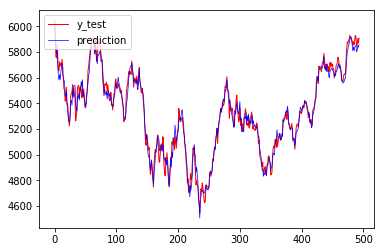

In [88]:
import matplotlib.pyplot as plt2

plt2.plot(new_y_test,color='red', label='y_test',linewidth='1.0')
plt2.plot(new_predict,color='blue', label='prediction',linewidth='0.7')
plt2.legend(loc='upper left')
plt2.show()